## <b>■ 복습</b>
    컴퓨터에게 단어의 의미를 알려주게끔 하는 방법들
    
    2장. 단어의 분산 표현을 추출 (개선된 통계기법)
    3장. 신경망을 이용해서 단어의 분산 표현 추출 (CBOW) - 작은 말뭉치
    4장. 신경망을 개선해서 단어의 분산 표현 추출 (CBOW) - 큰 말뭉치
        앞의 문장을 잊어버리는 문제가 발생해서 RNN 출현
        
    5장. RNN을 이용해서 단어의 의미를 파악할 수 있게 함
        순환신경망(기억하게 하는 신경망)
    

In [4]:
# coding: utf-8

import sys
sys.path.append('..')

from common.util import preprocess
text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

xs = corpus[:-1] # 입력데이터
ts = corpus[1:] # 타겟데이터

print(xs)
print(ts)

[0 1 2 3 4 1 5]
[1 2 3 4 1 5 6]


    You say goodbye and I say hello  .
     0   1     2     3  4  1    5
    [0   1     2     3  4  1    5     ]
    [    1     2     3  4  1    5    6]

#### 문제2. you say goodbye and i say hello 를 RNN 신경망에 넣어서 훈련 시키시오

In [2]:
# coding: utf-8
from common.util import preprocess
from ch05.simple_rnnlm import SimpleRnnlm
from dataset import ptb
from common.trainer import RnnlmTrainer
from common.optimizer import SGD
import sys
sys.path.append('..')

# 하이퍼파라미터 설정
batch_size = 1
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# text = 'You say goodbye and I say hello.'
# corpus, word_to_id, id_to_word = preprocess(text)

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')

corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)

optimizer = SGD(lr)

trainer = RnnlmTrainer(model, optimizer)

# 모델 훈련
trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()

| 에폭 1 |  반복 1 / 199 | 시간 0[s] | 퍼플렉서티 421.77
| 에폭 1 |  반복 21 / 199 | 시간 0[s] | 퍼플렉서티 403.49
| 에폭 1 |  반복 41 / 199 | 시간 0[s] | 퍼플렉서티 330.02
| 에폭 1 |  반복 61 / 199 | 시간 0[s] | 퍼플렉서티 287.39
| 에폭 1 |  반복 81 / 199 | 시간 0[s] | 퍼플렉서티 223.01
| 에폭 1 |  반복 101 / 199 | 시간 0[s] | 퍼플렉서티 235.59
| 에폭 1 |  반복 121 / 199 | 시간 0[s] | 퍼플렉서티 240.90
| 에폭 1 |  반복 141 / 199 | 시간 0[s] | 퍼플렉서티 190.65
| 에폭 1 |  반복 161 / 199 | 시간 0[s] | 퍼플렉서티 304.55
| 에폭 1 |  반복 181 / 199 | 시간 0[s] | 퍼플렉서티 320.37
| 에폭 2 |  반복 1 / 199 | 시간 0[s] | 퍼플렉서티 283.19
| 에폭 2 |  반복 21 / 199 | 시간 0[s] | 퍼플렉서티 331.53
| 에폭 2 |  반복 41 / 199 | 시간 0[s] | 퍼플렉서티 206.01
| 에폭 2 |  반복 61 / 199 | 시간 0[s] | 퍼플렉서티 239.35
| 에폭 2 |  반복 81 / 199 | 시간 0[s] | 퍼플렉서티 175.19
| 에폭 2 |  반복 101 / 199 | 시간 0[s] | 퍼플렉서티 168.46
| 에폭 2 |  반복 121 / 199 | 시간 0[s] | 퍼플렉서티 162.26
| 에폭 2 |  반복 141 / 199 | 시간 0[s] | 퍼플렉서티 163.09
| 에폭 2 |  반복 161 / 199 | 시간 0[s] | 퍼플렉서티 270.01
| 에폭 2 |  반복 181 / 199 | 시간 0[s] | 퍼플렉서티 209.61
| 에폭 3 |  반복 1 / 199 | 시간 0[s] | 퍼플렉서티 202.55
| 에폭 3

| 에폭 18 |  반복 81 / 199 | 시간 4[s] | 퍼플렉서티 11.23
| 에폭 18 |  반복 101 / 199 | 시간 4[s] | 퍼플렉서티 11.30
| 에폭 18 |  반복 121 / 199 | 시간 4[s] | 퍼플렉서티 10.45
| 에폭 18 |  반복 141 / 199 | 시간 4[s] | 퍼플렉서티 8.30
| 에폭 18 |  반복 161 / 199 | 시간 4[s] | 퍼플렉서티 6.66
| 에폭 18 |  반복 181 / 199 | 시간 4[s] | 퍼플렉서티 8.28
| 에폭 19 |  반복 1 / 199 | 시간 4[s] | 퍼플렉서티 9.34
| 에폭 19 |  반복 21 / 199 | 시간 4[s] | 퍼플렉서티 19.61
| 에폭 19 |  반복 41 / 199 | 시간 4[s] | 퍼플렉서티 6.38
| 에폭 19 |  반복 61 / 199 | 시간 4[s] | 퍼플렉서티 9.11
| 에폭 19 |  반복 81 / 199 | 시간 4[s] | 퍼플렉서티 8.26
| 에폭 19 |  반복 101 / 199 | 시간 4[s] | 퍼플렉서티 7.64
| 에폭 19 |  반복 121 / 199 | 시간 4[s] | 퍼플렉서티 11.02
| 에폭 19 |  반복 141 / 199 | 시간 4[s] | 퍼플렉서티 7.06
| 에폭 19 |  반복 161 / 199 | 시간 4[s] | 퍼플렉서티 5.42
| 에폭 19 |  반복 181 / 199 | 시간 4[s] | 퍼플렉서티 7.39
| 에폭 20 |  반복 1 / 199 | 시간 4[s] | 퍼플렉서티 5.86
| 에폭 20 |  반복 21 / 199 | 시간 4[s] | 퍼플렉서티 10.53
| 에폭 20 |  반복 41 / 199 | 시간 4[s] | 퍼플렉서티 6.55
| 에폭 20 |  반복 61 / 199 | 시간 4[s] | 퍼플렉서티 10.25
| 에폭 20 |  반복 81 / 199 | 시간 4[s] | 퍼플렉서티 7.08
| 에폭 20 |  반복 101 /

| 에폭 36 |  반복 61 / 199 | 시간 8[s] | 퍼플렉서티 1.35
| 에폭 36 |  반복 81 / 199 | 시간 8[s] | 퍼플렉서티 1.24
| 에폭 36 |  반복 101 / 199 | 시간 8[s] | 퍼플렉서티 1.36
| 에폭 36 |  반복 121 / 199 | 시간 8[s] | 퍼플렉서티 1.36
| 에폭 36 |  반복 141 / 199 | 시간 8[s] | 퍼플렉서티 1.33
| 에폭 36 |  반복 161 / 199 | 시간 8[s] | 퍼플렉서티 1.28
| 에폭 36 |  반복 181 / 199 | 시간 8[s] | 퍼플렉서티 1.26
| 에폭 37 |  반복 1 / 199 | 시간 8[s] | 퍼플렉서티 1.25
| 에폭 37 |  반복 21 / 199 | 시간 8[s] | 퍼플렉서티 1.37
| 에폭 37 |  반복 41 / 199 | 시간 8[s] | 퍼플렉서티 1.27
| 에폭 37 |  반복 61 / 199 | 시간 8[s] | 퍼플렉서티 1.22
| 에폭 37 |  반복 81 / 199 | 시간 8[s] | 퍼플렉서티 1.16
| 에폭 37 |  반복 101 / 199 | 시간 8[s] | 퍼플렉서티 1.24
| 에폭 37 |  반복 121 / 199 | 시간 8[s] | 퍼플렉서티 1.23
| 에폭 37 |  반복 141 / 199 | 시간 8[s] | 퍼플렉서티 1.18
| 에폭 37 |  반복 161 / 199 | 시간 8[s] | 퍼플렉서티 1.22
| 에폭 37 |  반복 181 / 199 | 시간 8[s] | 퍼플렉서티 1.15
| 에폭 38 |  반복 1 / 199 | 시간 8[s] | 퍼플렉서티 1.16
| 에폭 38 |  반복 21 / 199 | 시간 8[s] | 퍼플렉서티 1.20
| 에폭 38 |  반복 41 / 199 | 시간 8[s] | 퍼플렉서티 1.26
| 에폭 38 |  반복 61 / 199 | 시간 8[s] | 퍼플렉서티 1.22
| 에폭 38 |  반복 81 / 199 | 시

| 에폭 54 |  반복 41 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 61 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 81 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 101 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 121 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 141 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 161 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 54 |  반복 181 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 1 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 21 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 41 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 61 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 81 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 101 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 121 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 141 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 161 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 55 |  반복 181 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 56 |  반복 1 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 56 |  반복 21 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 56 |  반복 41 / 199 | 시간 12[s] | 퍼플렉서티 1.02
| 에폭 

| 에폭 71 |  반복 121 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 71 |  반복 141 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 71 |  반복 161 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 71 |  반복 181 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 1 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 21 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 41 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 61 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 81 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 101 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 121 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 141 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 161 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 72 |  반복 181 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 1 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 21 / 199 | 시간 15[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 41 / 199 | 시간 16[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 61 / 199 | 시간 16[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 81 / 199 | 시간 16[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 101 / 199 | 시간 16[s] | 퍼플렉서티 1.01
| 에폭 73 |  반복 121 / 199 | 시간 16[s] | 퍼플렉서티 1.01
| 에폭

<Figure size 640x480 with 1 Axes>

#### 문제3. you say goodbye and i say hello 를  Keras 의 RNN 신경망에 넣어서 훈련 시킬수 있도록 데이터를 구성하시오

In [3]:
import numpy as np

# you say goodbye and i say hello .
#  0   1    2      3  4  1   5    6
 
#xs = [ [0], [1], [2], [3], [4], [1], [5], [6]]
xs = [ [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0]]

#xs = [ [0], [1], [2], [3], [4], [1], [5], [6]]
#ts =  [1,   2,   3,   4,    1,   5,  6]
ts = [ [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1] ] 

xs = np.array(xs)
ts = np.array(ts)

# 여기서 중요 !!
# RNN 신경망에 입력하려면 위의 2차원을 3차원으로 변경해줘야 합니다.. 
# 3차원으로 변경하세요.

xs = xs.reshape(-1,1,7)
ts = ts.reshape(-1,7)

print(xs)
print(ts)

print(xs.shape)
print(ts.shape)

[[[1 0 0 0 0 0 0]]

 [[0 1 0 0 0 0 0]]

 [[0 0 1 0 0 0 0]]

 [[0 0 0 1 0 0 0]]

 [[0 0 0 0 1 0 0]]

 [[0 1 0 0 0 0 0]]

 [[0 0 0 0 0 1 0]]]
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
(7, 1, 7)
(7, 7)


#### 문제4. 그럼 위의 데이터를 keras 의 SimpleRNN 신경망에 넣으시오

In [4]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.

#model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)  # 책의 예시 
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = ( 1, 7 )))  # keras  문법

#model.add(Dense(1, activation = 'linear'))  # 예시 
model.add(Dense(7, activation = 'softmax'))

#model.compile(optimizer = 'adam', loss = 'mse') # 예시 
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

model.summary()

model.fit(xs, ts, epochs = 500, batch_size = 1)

result = model.predict(xs)
print(result)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 231       
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________
Train on 7 samples
Epoch 1/500
7/7 [==============================] - 1s 138ms/sample - loss: 2.0132
Epoch 2/500
7/7 [==============================] - 0s 3ms/sample - loss: 1.9775
Epoch 3/500
7/7 [==============================] - 0s 2ms/sample - loss: 1.9502
Epoch 4/500
7/7 [==============================] - 0s 2ms/sample - loss: 1.9219
Epoch 5/500
7/7 [==============================] - 0s 3ms/sample - loss: 1.8966
Epoch 6/500
7/7 [==============================] - 0s 2ms/sample - loss: 1.8686
Epoch 7/500
7

7/7 [==============================] - 0s 2ms/sample - loss: 0.2410
Epoch 195/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2419
Epoch 196/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2394
Epoch 197/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2402
Epoch 198/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2396
Epoch 199/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2381
Epoch 200/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2388
Epoch 201/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2375
Epoch 202/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2376
Epoch 203/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2369
Epoch 204/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2355
Epoch 205/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2354
Epoch 206/500
7/7 [===========

7/7 [==============================] - 0s 2ms/sample - loss: 0.2160
Epoch 295/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2141
Epoch 296/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2143
Epoch 297/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2141
Epoch 298/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2151
Epoch 299/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2140
Epoch 300/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2137
Epoch 301/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2135
Epoch 302/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2142
Epoch 303/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2139
Epoch 304/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2132
Epoch 305/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2139
Epoch 306/500
7/7 [===========

7/7 [==============================] - 0s 2ms/sample - loss: 0.2064
Epoch 395/500
7/7 [==============================] - 0s 3ms/sample - loss: 0.2065
Epoch 396/500
7/7 [==============================] - 0s 3ms/sample - loss: 0.2068
Epoch 397/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2071
Epoch 398/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2065
Epoch 399/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2081
Epoch 400/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2084
Epoch 401/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2069
Epoch 402/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2063
Epoch 403/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2068
Epoch 404/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2084
Epoch 405/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2061
Epoch 406/500
7/7 [===========

7/7 [==============================] - 0s 2ms/sample - loss: 0.2036
Epoch 495/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2051
Epoch 496/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2030
Epoch 497/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2029
Epoch 498/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2037
Epoch 499/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2043
Epoch 500/500
7/7 [==============================] - 0s 2ms/sample - loss: 0.2044
[[1.02202685e-04 9.97645557e-01 3.96131305e-04 3.71574890e-04
  2.43159418e-04 6.98177901e-04 5.43200062e-04]
 [4.46097227e-04 1.93579926e-03 4.93206859e-01 7.43072538e-04
  1.37797301e-03 5.00585318e-01 1.70485070e-03]
 [3.41335282e-04 7.46948994e-04 8.14427331e-04 9.96312082e-01
  7.15787872e-04 2.73435144e-04 7.96058623e-04]
 [3.40336032e-04 1.23519311e-03 9.65424522e-04 8.99565290e-04
  9.95342255e-01 8.94578523e-04 3.22773907e-04]


#### 문제5.  문제4번의 소프트맥스 출력 결과중에 argmax 값을 출력하시오 !

In [18]:
result = model.predict(xs)
rs2 = np.argmax(result, axis=1)
ts2 = np.argmax(ts, axis=1)
print(rs2)
print(ts2)
print(np.sum(rs2!=ts2))
print(np.where(rs2!=ts2))
print(rs2[ts2!=rs2])

[1 5 3 4 1 5 6]
[1 2 3 4 1 5 6]
1
(array([1], dtype=int64),)
[5]


#### 문제6. 위의 문제들에서는 You say goodbye and I say hello. 를 손으로 직접 원핫표현으로 변경했는데 밑바닥 딥러닝2권의 3장 word2vec 에서 나오는 아래의 스크립트를 이용해서 원핫표현으로 변경하시오.

In [21]:
from common.util import preprocess, create_contexts_target, convert_one_hot
import sys

sys.path.append('..')

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size=1)
vocab_size = len(word_to_id)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

xs = corpus[:-1]
ts = corpus[1:]

print(xs)
print(ts)

# print(target)
# print(contexts)

[0 1 2 3 4 1 5]
[1 2 3 4 1 5 6]


#### 문제7. (점심시간 문제)위의 숫자를 원핫 표현으로 변경하시오

In [24]:
import sys
sys.path.append('..')

from common.util import preprocess, create_contexts_target, convert_one_hot
text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

target = corpus[1:]
contexts = corpus[:-1]

vocab_size = len(word_to_id)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(target)
print()
print(contexts)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


#### 문제8. 위의 원핫 표현을  RNN 신경망에 넣고 학습 시켜보시오

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from common.util import preprocess, create_contexts_target, convert_one_hot
import sys
sys.path.append('..')

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)

target = corpus[1:]
corpus = corpus[:-1]

vocab_size = len(word_to_id)

corpus = convert_one_hot(corpus, vocab_size)
print(corpus)
print(np.argmax(corpus, axis=1))

target = convert_one_hot(target, vocab_size)
print(target)
print(np.argmax(target, axis=1))

xs = corpus
ts = target

xs = xs.reshape(-1, 1, 7)
ts = ts.reshape(-1, 7)


n = 1
model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,

# 반드시 input_shape를 명시해주어야 합니다.

model.add(SimpleRNN(units=7, activation='tanh', input_shape=(1, 7)))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()

model.fit(xs, ts, epochs=1000, batch_size=1)

result = model.predict(xs)
print(result)

print(np.argmax(result, axis=1))

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[0 1 2 3 4 1 5]
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
[1 2 3 4 1 5 6]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 7)                 105       
_________________________________________________________________
dense (Dense)                (None, 7)                 56        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Train on 7 samples
Epoch 1/1000
7/7 [==============================] - 1s 91ms/sample - loss: 1.8778
Epoch 2/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.8639
Epoch 3/1000
7/7 [==============================] - 0s 2ms/sample 

Epoch 90/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0740
Epoch 91/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0665
Epoch 92/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0589
Epoch 93/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0512
Epoch 94/1000
7/7 [==============================] - 0s 3ms/sample - loss: 1.0435
Epoch 95/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0362
Epoch 96/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0294
Epoch 97/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0221
Epoch 98/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0147
Epoch 99/1000
7/7 [==============================] - 0s 2ms/sample - loss: 1.0069
Epoch 100/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.9998
Epoch 101/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.9925
Epoch 102/1000

7/7 [==============================] - 0s 2ms/sample - loss: 0.5132
Epoch 189/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.5095
Epoch 190/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.5062
Epoch 191/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.5024
Epoch 192/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4986
Epoch 193/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4954
Epoch 194/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4924
Epoch 195/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4885
Epoch 196/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4856
Epoch 197/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4831
Epoch 198/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4794
Epoch 199/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.4759
Epoch 200/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.3145
Epoch 287/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3136
Epoch 288/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3125
Epoch 289/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3116
Epoch 290/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3112
Epoch 291/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3097
Epoch 292/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3088
Epoch 293/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3080
Epoch 294/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3068
Epoch 295/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3059
Epoch 296/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.3050
Epoch 297/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.3043
Epoch 298/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2543
Epoch 385/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2538
Epoch 386/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2533
Epoch 387/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2531
Epoch 388/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2525
Epoch 389/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2522
Epoch 390/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2518
Epoch 391/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2516
Epoch 392/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2511
Epoch 393/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2510
Epoch 394/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2510
Epoch 395/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2504
Epoch 396/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2298
Epoch 483/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2296
Epoch 484/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2294
Epoch 485/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2292
Epoch 486/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2296
Epoch 487/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2299
Epoch 488/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2291
Epoch 489/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2289
Epoch 490/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2294
Epoch 491/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2287
Epoch 492/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2286
Epoch 493/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2287
Epoch 494/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2178
Epoch 581/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2184
Epoch 582/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2176
Epoch 583/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2180
Epoch 584/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2174
Epoch 585/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2173
Epoch 586/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2175
Epoch 587/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2178
Epoch 588/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2176
Epoch 589/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2170
Epoch 590/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2170
Epoch 591/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2171
Epoch 592/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2111
Epoch 679/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2113
Epoch 680/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2110
Epoch 681/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2113
Epoch 682/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2111
Epoch 683/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2113
Epoch 684/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2108
Epoch 685/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2109
Epoch 686/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2109
Epoch 687/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2111
Epoch 688/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2111
Epoch 689/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2112
Epoch 690/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2071
Epoch 777/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2074
Epoch 778/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2071
Epoch 779/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2071
Epoch 780/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2071
Epoch 781/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2072
Epoch 782/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2067
Epoch 783/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2068
Epoch 784/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2074
Epoch 785/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2068
Epoch 786/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2066
Epoch 787/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2067
Epoch 788/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2045
Epoch 875/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2044
Epoch 876/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2045
Epoch 877/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2045
Epoch 878/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2043
Epoch 879/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2044
Epoch 880/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2044
Epoch 881/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2044
Epoch 882/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2045
Epoch 883/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2042
Epoch 884/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2047
Epoch 885/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2046
Epoch 886/1000
7/7 

7/7 [==============================] - 0s 2ms/sample - loss: 0.2028
Epoch 973/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2026
Epoch 974/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2025
Epoch 975/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2032
Epoch 976/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2025
Epoch 977/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2026
Epoch 978/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2028
Epoch 979/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2025
Epoch 980/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2029
Epoch 981/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2026
Epoch 982/1000
7/7 [==============================] - 0s 3ms/sample - loss: 0.2025
Epoch 983/1000
7/7 [==============================] - 0s 2ms/sample - loss: 0.2024
Epoch 984/1000
7/7 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from common.util import preprocess, create_contexts_target, convert_one_hot
import sys
sys.path.append('..')

text = '''You say goodbye and I say hello. I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.
The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: "We have an unexpected baby boy; do you want him?" They said: "Of course." My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to college.
And 17 years later I did go to college. But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition. After six months, I couldn't see the value in it. I had no idea what I wanted to do with my life and no idea how college was going to help me figure it out. And here I was spending all of the money my parents had saved their entire life. So I decided to drop out and trust that it would all work out OK. It was pretty scary at the time, but looking back it was one of the best decisions I ever made. The minute I dropped out I could stop taking the required classes that didn't interest me, and begin dropping in on the ones that looked interesting.
It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms, I returned coke bottles for the 5¢ deposits to buy food with, and I would walk the 7 miles across town every Sunday night to get one good meal a week at the Hare Krishna temple. I loved it. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. Let me give you one example:
Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed. Because I had dropped out and didn't have to take the normal classes, I decided to take a calligraphy class to learn how to do this. I learned about serif and san serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great. It was beautiful, historical, artistically subtle in a way that science can't capture, and I found it fascinating.
None of this had even a hope of any practical application in my life. But ten years later, when we were designing the first Macintosh computer, it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography. If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces or proportionally spaced fonts. And since Windows just copied the Mac, its likely that no personal computer would have them. If I had never dropped out, I would have never dropped in on this calligraphy class, and personal computers might not have the wonderful typography that they do. Of course it was impossible to connect the dots looking forward when I was in college. But it was very, very clear looking backwards ten years later.
Again, you can't connect the dots looking forward; you can only connect them looking backwards. So you have to trust that the dots will somehow connect in your future. You have to trust in something — your gut, destiny, life, karma, whatever. This approach has never let me down, and it has made all the difference in my life.
My second story is about love and loss.I was lucky — I found what I loved to do early in life. Woz and I started Apple in my parents garage when I was 20. We worked hard, and in 10 years Apple had grown from just the two of us in a garage into a $2 billion company with over 4000 employees. We had just released our finest creation — the Macintosh — a year earlier, and I had just turned 30. And then I got fired. How can you get fired from a company you started? Well, as Apple grew we hired someone who I thought was very talented to run the company with me, and for the first year or so things went well. But then our visions of the future began to diverge and eventually we had a falling out. When we did, our Board of Directors sided with him. So at 30 I was out. And very publicly out. What had been the focus of my entire adult life was gone, and it was devastating.
I really didn't know what to do for a few months. I felt that I had let the previous generation of entrepreneurs down - that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me — I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over.
I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life.
During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing woman who would become my wife. Pixar went on to create the worlds first computer animated feature film, Toy Story, and is now the most successful animation studio in the world. In a remarkable turn of events, Apple bought NeXT, I returned to Apple, and the technology we developed at NeXT is at the heart of Apple's current renaissance. And Laurene and I have a wonderful family together.
I'm pretty sure none of this would have happened if I hadn't been fired from Apple. It was awful tasting medicine, but I guess the patient needed it. Sometimes life hits you in the head with a brick. Don't lose faith. I'm convinced that the only thing that kept me going was that I loved what I did. You've got to find what you love. And that is as true for your work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking. Don't settle. As with all matters of the heart, you'll know when you find it. And, like any great relationship, it just gets better and better as the years roll on. So keep looking until you find it. Don't settle.
My third story is about death. When I was 17, I read a quote that went something like: "If you live each day as if it was your last, someday you'll most certainly be right." It made an impression on me, and since then, for the past 33 years, I have looked in the mirror every morning and asked myself: "If today were the last day of my life, would I want to do what I am about to do today?" And whenever the answer has been "No" for too many days in a row, I know I need to change something.
Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life. Because almost everything — all external expectations, all pride, all fear of embarrassment or failure - these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart.
About a year ago I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn't even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor's code for prepare to die. It means to try to tell your kids everything you thought you'd have the next 10 years to tell them in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes.
I lived with that diagnosis all day. Later that evening I had a biopsy, where they stuck an endoscope down my throat, through my stomach and into my intestines, put a needle into my pancreas and got a few cells from the tumor. I was sedated, but my wife, who was there, told me that when they viewed the cells under a microscope the doctors started crying because it turned out to be a very rare form of pancreatic cancer that is curable with surgery. I had the surgery and I'm fine now.
This was the closest I've been to facing death, and I hope its the closest I get for a few more decades. Having lived through it, I can now say this to you with a bit more certainty than when death was a useful but purely intellectual concept:
No one wants to die. Even people who want to go to heaven don't want to die to get there. And yet death is the destination we all share. No one has ever escaped it. And that is as it should be, because Death is very likely the single best invention of Life. It is Life's change agent. It clears out the old to make way for the new. Right now the new is you, but someday not too long from now, you will gradually become the old and be cleared away. Sorry to be so dramatic, but it is quite true.
Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma — which is living with the results of other people's thinking. Don't let the noise of others' opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.
When I was young, there was an amazing publication called The Whole Earth Catalog, which was one of the bibles of my generation. It was created by a fellow named Stewart Brand not far from here in Menlo Park, and he brought it to life with his poetic touch. This was in the late 1960's, before personal computers and desktop publishing, so it was all made with typewriters, scissors, and polaroid cameras. It was sort of like Google in paperback form, 35 years before Google came along: it was idealistic, and overflowing with neat tools and great notions.
Stewart and his team put out several issues of The Whole Earth Catalog, and then when it had run its course, they put out a final issue. It was the mid-1970s, and I was your age. On the back cover of their final issue was a photograph of an early morning country road, the kind you might find yourself hitchhiking on if you were so adventurous. Beneath it were the words: "Stay Hungry. Stay Foolish." It was their farewell message as they signed off. Stay Hungry. Stay Foolish. And I have always wished that for myself. And now, as you graduate to begin anew, I wish that for you.
Stay Hungry. Stay Foolish.Thank you all very much.'''

corpus, word_to_id, id_to_word = preprocess(text)

target = corpus[1:]
corpus = corpus[:-1]

vocab_size = len(word_to_id)

corpus = convert_one_hot(corpus, vocab_size)
target = convert_one_hot(target, vocab_size)


xs = corpus
ts = target

xs = xs.reshape(-1, 1, 790)
ts = ts.reshape(-1, 790)

n = 1
model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,

# 반드시 input_shape를 명시해주어야 합니다.

model.add(SimpleRNN(units=790, activation='tanh', input_shape=(1, 790)))
model.add(Dense(790, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.summary()

model.fit(xs, ts, epochs=10, batch_size=1)

result = model.predict(xs)
print(result)

print(np.argmax(result, axis=1))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 790)               1248990   
_________________________________________________________________
dense_5 (Dense)              (None, 790)               624890    
Total params: 1,873,880
Trainable params: 1,873,880
Non-trainable params: 0
_________________________________________________________________
Train on 2380 samples
Epoch 1/10
2380/2380 [==============================] - 6s 3ms/sample - loss: 5.9613 0s - loss: 5.
Epoch 2/10
2380/2380 [==============================] - 6s 2ms/sample - loss: 4.3998
Epoch 3/10
2380/2380 [==============================] - 6s 2ms/sample - loss: 3.3374
Epoch 4/10
2380/2380 [==============================] - 6s 2ms/sample - loss: 2.8013
Epoch 5/10
2380/2380 [==============================] - 6s 2ms/sample - loss: 2.6464
Epoch 6/10
2380/2380 [=======================

#### 문제10. 위의 스크립트의 하이퍼 파라미터를 조절해서 성능을 올리시오 !

In [8]:
import numpy as np

import sys
sys.path.append('..')

from common.util import preprocess, create_contexts_target, convert_one_hot
text = '''You say goodbye and I say hello. I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.
The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: "We have an unexpected baby boy; do you want him?" They said: "Of course." My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to college.
And 17 years later I did go to college. But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition. After six months, I couldn't see the value in it. I had no idea what I wanted to do with my life and no idea how college was going to help me figure it out. And here I was spending all of the money my parents had saved their entire life. So I decided to drop out and trust that it would all work out OK. It was pretty scary at the time, but looking back it was one of the best decisions I ever made. The minute I dropped out I could stop taking the required classes that didn't interest me, and begin dropping in on the ones that looked interesting.
It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms, I returned coke bottles for the 5¢ deposits to buy food with, and I would walk the 7 miles across town every Sunday night to get one good meal a week at the Hare Krishna temple. I loved it. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. Let me give you one example:
Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed. Because I had dropped out and didn't have to take the normal classes, I decided to take a calligraphy class to learn how to do this. I learned about serif and san serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great. It was beautiful, historical, artistically subtle in a way that science can't capture, and I found it fascinating.
None of this had even a hope of any practical application in my life. But ten years later, when we were designing the first Macintosh computer, it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography. If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces or proportionally spaced fonts. And since Windows just copied the Mac, its likely that no personal computer would have them. If I had never dropped out, I would have never dropped in on this calligraphy class, and personal computers might not have the wonderful typography that they do. Of course it was impossible to connect the dots looking forward when I was in college. But it was very, very clear looking backwards ten years later.
Again, you can't connect the dots looking forward; you can only connect them looking backwards. So you have to trust that the dots will somehow connect in your future. You have to trust in something — your gut, destiny, life, karma, whatever. This approach has never let me down, and it has made all the difference in my life.
My second story is about love and loss.I was lucky — I found what I loved to do early in life. Woz and I started Apple in my parents garage when I was 20. We worked hard, and in 10 years Apple had grown from just the two of us in a garage into a $2 billion company with over 4000 employees. We had just released our finest creation — the Macintosh — a year earlier, and I had just turned 30. And then I got fired. How can you get fired from a company you started? Well, as Apple grew we hired someone who I thought was very talented to run the company with me, and for the first year or so things went well. But then our visions of the future began to diverge and eventually we had a falling out. When we did, our Board of Directors sided with him. So at 30 I was out. And very publicly out. What had been the focus of my entire adult life was gone, and it was devastating.
I really didn't know what to do for a few months. I felt that I had let the previous generation of entrepreneurs down - that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me — I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over.
I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life.
During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing woman who would become my wife. Pixar went on to create the worlds first computer animated feature film, Toy Story, and is now the most successful animation studio in the world. In a remarkable turn of events, Apple bought NeXT, I returned to Apple, and the technology we developed at NeXT is at the heart of Apple's current renaissance. And Laurene and I have a wonderful family together.
I'm pretty sure none of this would have happened if I hadn't been fired from Apple. It was awful tasting medicine, but I guess the patient needed it. Sometimes life hits you in the head with a brick. Don't lose faith. I'm convinced that the only thing that kept me going was that I loved what I did. You've got to find what you love. And that is as true for your work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking. Don't settle. As with all matters of the heart, you'll know when you find it. And, like any great relationship, it just gets better and better as the years roll on. So keep looking until you find it. Don't settle.
My third story is about death. When I was 17, I read a quote that went something like: "If you live each day as if it was your last, someday you'll most certainly be right." It made an impression on me, and since then, for the past 33 years, I have looked in the mirror every morning and asked myself: "If today were the last day of my life, would I want to do what I am about to do today?" And whenever the answer has been "No" for too many days in a row, I know I need to change something.
Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life. Because almost everything — all external expectations, all pride, all fear of embarrassment or failure - these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart.
About a year ago I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn't even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor's code for prepare to die. It means to try to tell your kids everything you thought you'd have the next 10 years to tell them in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes.
I lived with that diagnosis all day. Later that evening I had a biopsy, where they stuck an endoscope down my throat, through my stomach and into my intestines, put a needle into my pancreas and got a few cells from the tumor. I was sedated, but my wife, who was there, told me that when they viewed the cells under a microscope the doctors started crying because it turned out to be a very rare form of pancreatic cancer that is curable with surgery. I had the surgery and I'm fine now.
This was the closest I've been to facing death, and I hope its the closest I get for a few more decades. Having lived through it, I can now say this to you with a bit more certainty than when death was a useful but purely intellectual concept:
No one wants to die. Even people who want to go to heaven don't want to die to get there. And yet death is the destination we all share. No one has ever escaped it. And that is as it should be, because Death is very likely the single best invention of Life. It is Life's change agent. It clears out the old to make way for the new. Right now the new is you, but someday not too long from now, you will gradually become the old and be cleared away. Sorry to be so dramatic, but it is quite true.
Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma — which is living with the results of other people's thinking. Don't let the noise of others' opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.
When I was young, there was an amazing publication called The Whole Earth Catalog, which was one of the bibles of my generation. It was created by a fellow named Stewart Brand not far from here in Menlo Park, and he brought it to life with his poetic touch. This was in the late 1960's, before personal computers and desktop publishing, so it was all made with typewriters, scissors, and polaroid cameras. It was sort of like Google in paperback form, 35 years before Google came along: it was idealistic, and overflowing with neat tools and great notions.
Stewart and his team put out several issues of The Whole Earth Catalog, and then when it had run its course, they put out a final issue. It was the mid-1970s, and I was your age. On the back cover of their final issue was a photograph of an early morning country road, the kind you might find yourself hitchhiking on if you were so adventurous. Beneath it were the words: "Stay Hungry. Stay Foolish." It was their farewell message as they signed off. Stay Hungry. Stay Foolish. And I have always wished that for myself. And now, as you graduate to begin anew, I wish that for you.
Stay Hungry. Stay Foolish.Thank you all very much.'''

corpus, word_to_id, id_to_word = preprocess(text)

target = corpus[1:]
corpus = corpus[:-1]

vocab_size = len(word_to_id)

corpus = convert_one_hot(corpus, vocab_size)
print ( corpus )
print( np.argmax(corpus, axis=1))

target = convert_one_hot(target, vocab_size)
print ( target )
print ( np.argmax(target, axis=1 ))

xs= corpus
ts = target

print(xs.shape)
print(ts.shape)


xs = xs.reshape(-1, 1, 790)
ts = ts.reshape(-1, 790)


from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

n = 1
model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,

# 반드시 input_shape를 명시해주어야 합니다.

#model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)

model.add(SimpleRNN(units = 790, activation = 'tanh', input_shape = ( 1, 790 )))
#model.add(Dense(100, activation = 'relu'))
model.add(Dense(790, activation = 'softmax'))

#model.compile(optimizer = 'adam', loss = 'mse')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

model.summary()

history = model.fit(xs, ts, epochs = 500, batch_size = 10)

result = model.predict(xs)
print(result)

print( np.argmax(result, axis=1) )

y =  np.argmax(result, axis=1) 
t =  np.argmax(ts, axis=1) 

print(len(y))
print(sum(np.equal(y,t) ))

print( sum(np.equal(y,t) )/len(y) )

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0   1   2 ... 104  96 245]
[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  1   2   3 ...  96 245   6]
(2380, 790)
(2380, 790)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 790)               1248990   
_________________________________________________________________
dense_6 (Dense)              (None, 790)               624890    
Total params: 1,873,880
Trainable params: 1,873,880
Non-trainable params: 0
_________________________________________________________________
Train on 2380 samples
Epoch 1/500
2380/2380 [==============================] - 1s 453us/sample - loss: 6.1316
Epoch 2/500
2380/2380 [==============================] - 1s 276us/sample

2380/2380 [==============================] - 1s 258us/sample - loss: 2.0085
Epoch 83/500
2380/2380 [==============================] - 1s 268us/sample - loss: 2.0097
Epoch 84/500
2380/2380 [==============================] - 1s 266us/sample - loss: 2.0109
Epoch 85/500
2380/2380 [==============================] - 1s 254us/sample - loss: 2.0091
Epoch 86/500
2380/2380 [==============================] - 1s 273us/sample - loss: 2.0044
Epoch 87/500
2380/2380 [==============================] - 1s 259us/sample - loss: 2.0096
Epoch 88/500
2380/2380 [==============================] - 1s 257us/sample - loss: 2.0074
Epoch 89/500
2380/2380 [==============================] - 1s 265us/sample - loss: 2.0063
Epoch 90/500
2380/2380 [==============================] - 1s 264us/sample - loss: 2.0072
Epoch 91/500
2380/2380 [==============================] - 1s 262us/sample - loss: 2.0052
Epoch 92/500
2380/2380 [==============================] - 1s 257us/sample - loss: 2.0021
Epoch 93/500
2380/2380 [==========

2380/2380 [==============================] - 1s 285us/sample - loss: 1.9632
Epoch 174/500
2380/2380 [==============================] - 1s 269us/sample - loss: 1.9620
Epoch 175/500
2380/2380 [==============================] - 1s 261us/sample - loss: 1.9627
Epoch 176/500
2380/2380 [==============================] - 1s 287us/sample - loss: 1.9635
Epoch 177/500
2380/2380 [==============================] - 1s 317us/sample - loss: 1.9602
Epoch 178/500
2380/2380 [==============================] - 1s 274us/sample - loss: 1.9643
Epoch 179/500
2380/2380 [==============================] - 1s 274us/sample - loss: 1.9601
Epoch 180/500
2380/2380 [==============================] - 1s 273us/sample - loss: 1.9576
Epoch 181/500
2380/2380 [==============================] - 1s 263us/sample - loss: 1.9564
Epoch 182/500
2380/2380 [==============================] - 1s 264us/sample - loss: 1.9599
Epoch 183/500
2380/2380 [==============================] - 1s 281us/sample - loss: 1.9558
Epoch 184/500
2380/2380 

2380/2380 [==============================] - 1s 290us/sample - loss: 1.9323
Epoch 265/500
2380/2380 [==============================] - 1s 269us/sample - loss: 1.9328
Epoch 266/500
2380/2380 [==============================] - 1s 257us/sample - loss: 1.9302
Epoch 267/500
2380/2380 [==============================] - 1s 268us/sample - loss: 1.9293
Epoch 268/500
2380/2380 [==============================] - 1s 273us/sample - loss: 1.9312
Epoch 269/500
2380/2380 [==============================] - 1s 265us/sample - loss: 1.9283
Epoch 270/500
2380/2380 [==============================] - 1s 276us/sample - loss: 1.9278
Epoch 271/500
2380/2380 [==============================] - 1s 276us/sample - loss: 1.9292
Epoch 272/500
2380/2380 [==============================] - 1s 272us/sample - loss: 1.9288
Epoch 273/500
2380/2380 [==============================] - 1s 279us/sample - loss: 1.9273
Epoch 274/500
2380/2380 [==============================] - 1s 294us/sample - loss: 1.9274
Epoch 275/500
2380/2380 

2380/2380 [==============================] - 1s 264us/sample - loss: 1.9113
Epoch 356/500
2380/2380 [==============================] - 1s 291us/sample - loss: 1.9125
Epoch 357/500
2380/2380 [==============================] - 1s 277us/sample - loss: 1.9110
Epoch 358/500
2380/2380 [==============================] - 1s 267us/sample - loss: 1.9100
Epoch 359/500
2380/2380 [==============================] - 1s 258us/sample - loss: 1.9080
Epoch 360/500
2380/2380 [==============================] - 1s 262us/sample - loss: 1.9082
Epoch 361/500
2380/2380 [==============================] - 1s 264us/sample - loss: 1.9086
Epoch 362/500
2380/2380 [==============================] - 1s 279us/sample - loss: 1.9095
Epoch 363/500
2380/2380 [==============================] - 1s 265us/sample - loss: 1.9075
Epoch 364/500
2380/2380 [==============================] - 1s 278us/sample - loss: 1.9108
Epoch 365/500
2380/2380 [==============================] - 1s 254us/sample - loss: 1.9100
Epoch 366/500
2380/2380 

2380/2380 [==============================] - 1s 267us/sample - loss: 1.8986
Epoch 447/500
2380/2380 [==============================] - 1s 266us/sample - loss: 1.8959
Epoch 448/500
2380/2380 [==============================] - 1s 257us/sample - loss: 1.8943
Epoch 449/500
2380/2380 [==============================] - 1s 269us/sample - loss: 1.8976
Epoch 450/500
2380/2380 [==============================] - 1s 271us/sample - loss: 1.8964
Epoch 451/500
2380/2380 [==============================] - 1s 263us/sample - loss: 1.8962
Epoch 452/500
2380/2380 [==============================] - 1s 264us/sample - loss: 1.8979
Epoch 453/500
2380/2380 [==============================] - 1s 270us/sample - loss: 1.8967
Epoch 454/500
2380/2380 [==============================] - 1s 264us/sample - loss: 1.8932
Epoch 455/500
2380/2380 [==============================] - 1s 268us/sample - loss: 1.8972
Epoch 456/500
2380/2380 [==============================] - 1s 267us/sample - loss: 1.8961
Epoch 457/500
2380/2380 

#### 문제11. 위의 스크립트에 시각화를 추가하시오

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  0   1   2 ... 104  96 245]
[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[  1   2   3 ...  96 245   6]
(2380, 790)
(2380, 790)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 79)                68730     
_________________________________________________________________
dense_7 (Dense)              (None, 790)               63200     
Total params: 131,930
Trainable params: 131,930
Non-trainable params: 0
_________________________________________________________________
Train on 2380 samples
Epoch 1/500
2380/2380 [==============================] - 1s 395us/sample - loss: 6.4222
Epoch 2/500
2380/2380 [==============================] - 1s 253us/sample - l

2380/2380 [==============================] - 1s 217us/sample - loss: 1.8693
Epoch 83/500
2380/2380 [==============================] - 1s 215us/sample - loss: 1.8708
Epoch 84/500
2380/2380 [==============================] - 1s 216us/sample - loss: 1.8708
Epoch 85/500
2380/2380 [==============================] - 1s 229us/sample - loss: 1.8680
Epoch 86/500
2380/2380 [==============================] - 1s 221us/sample - loss: 1.8697
Epoch 87/500
2380/2380 [==============================] - 1s 221us/sample - loss: 1.8687
Epoch 88/500
2380/2380 [==============================] - 1s 210us/sample - loss: 1.8697
Epoch 89/500
2380/2380 [==============================] - 1s 224us/sample - loss: 1.8691
Epoch 90/500
2380/2380 [==============================] - 1s 222us/sample - loss: 1.8696
Epoch 91/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8685
Epoch 92/500
2380/2380 [==============================] - 1s 212us/sample - loss: 1.8688
Epoch 93/500
2380/2380 [==========

2380/2380 [==============================] - 1s 218us/sample - loss: 1.8640
Epoch 174/500
2380/2380 [==============================] - 1s 217us/sample - loss: 1.8635
Epoch 175/500
2380/2380 [==============================] - 0s 209us/sample - loss: 1.8642
Epoch 176/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8644
Epoch 177/500
2380/2380 [==============================] - 1s 216us/sample - loss: 1.8649
Epoch 178/500
2380/2380 [==============================] - 1s 221us/sample - loss: 1.8650
Epoch 179/500
2380/2380 [==============================] - 1s 212us/sample - loss: 1.8645
Epoch 180/500
2380/2380 [==============================] - 1s 218us/sample - loss: 1.8636
Epoch 181/500
2380/2380 [==============================] - 1s 217us/sample - loss: 1.8633
Epoch 182/500
2380/2380 [==============================] - 1s 218us/sample - loss: 1.8653
Epoch 183/500
2380/2380 [==============================] - 1s 223us/sample - loss: 1.8652
Epoch 184/500
2380/2380 

2380/2380 [==============================] - 1s 216us/sample - loss: 1.8626
Epoch 265/500
2380/2380 [==============================] - 1s 212us/sample - loss: 1.8633
Epoch 266/500
2380/2380 [==============================] - 1s 214us/sample - loss: 1.8629
Epoch 267/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8628
Epoch 268/500
2380/2380 [==============================] - 1s 214us/sample - loss: 1.8632
Epoch 269/500
2380/2380 [==============================] - 0s 206us/sample - loss: 1.8628
Epoch 270/500
2380/2380 [==============================] - 1s 214us/sample - loss: 1.8628
Epoch 271/500
2380/2380 [==============================] - 1s 214us/sample - loss: 1.8630
Epoch 272/500
2380/2380 [==============================] - 1s 216us/sample - loss: 1.8634
Epoch 273/500
2380/2380 [==============================] - 1s 211us/sample - loss: 1.8605
Epoch 274/500
2380/2380 [==============================] - 1s 215us/sample - loss: 1.8636
Epoch 275/500
2380/2380 

2380/2380 [==============================] - 1s 222us/sample - loss: 1.8618
Epoch 356/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8614
Epoch 357/500
2380/2380 [==============================] - 1s 218us/sample - loss: 1.8613
Epoch 358/500
2380/2380 [==============================] - 1s 218us/sample - loss: 1.8623
Epoch 359/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8619
Epoch 360/500
2380/2380 [==============================] - 1s 220us/sample - loss: 1.8631
Epoch 361/500
2380/2380 [==============================] - 1s 216us/sample - loss: 1.8616
Epoch 362/500
2380/2380 [==============================] - 1s 221us/sample - loss: 1.8616
Epoch 363/500
2380/2380 [==============================] - 1s 220us/sample - loss: 1.8611s - loss: 1.86
Epoch 364/500
2380/2380 [==============================] - 1s 217us/sample - loss: 1.8612
Epoch 365/500
2380/2380 [==============================] - 1s 216us/sample - loss: 1.8623
Epoch 366/

Epoch 446/500
2380/2380 [==============================] - 1s 221us/sample - loss: 1.8600
Epoch 447/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8612
Epoch 448/500
2380/2380 [==============================] - 1s 212us/sample - loss: 1.8614
Epoch 449/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8605
Epoch 450/500
2380/2380 [==============================] - 1s 215us/sample - loss: 1.8603
Epoch 451/500
2380/2380 [==============================] - 1s 217us/sample - loss: 1.8606
Epoch 452/500
2380/2380 [==============================] - 1s 211us/sample - loss: 1.8608
Epoch 453/500
2380/2380 [==============================] - 1s 219us/sample - loss: 1.8587
Epoch 454/500
2380/2380 [==============================] - 1s 211us/sample - loss: 1.8609
Epoch 455/500
2380/2380 [==============================] - 0s 209us/sample - loss: 1.8610
Epoch 456/500
2380/2380 [==============================] - 1s 214us/sample - loss: 1.8609
Epoch 457/

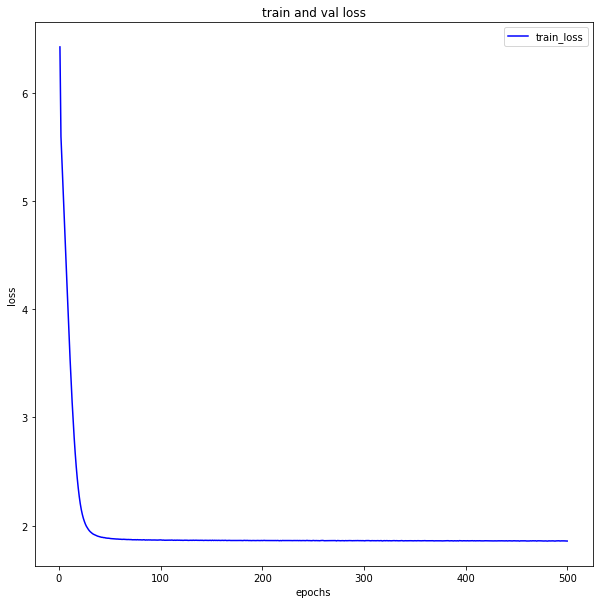

In [11]:
import numpy as np

import sys
sys.path.append('..')

from common.util import preprocess, create_contexts_target, convert_one_hot
text = '''You say goodbye and I say hello. I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I've ever gotten to a college graduation. Today I want to tell you three stories from my life. That's it. No big deal. Just three stories.
The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out?
It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: "We have an unexpected baby boy; do you want him?" They said: "Of course." My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to college.
And 17 years later I did go to college. But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents' savings were being spent on my college tuition. After six months, I couldn't see the value in it. I had no idea what I wanted to do with my life and no idea how college was going to help me figure it out. And here I was spending all of the money my parents had saved their entire life. So I decided to drop out and trust that it would all work out OK. It was pretty scary at the time, but looking back it was one of the best decisions I ever made. The minute I dropped out I could stop taking the required classes that didn't interest me, and begin dropping in on the ones that looked interesting.
It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms, I returned coke bottles for the 5¢ deposits to buy food with, and I would walk the 7 miles across town every Sunday night to get one good meal a week at the Hare Krishna temple. I loved it. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. Let me give you one example:
Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed. Because I had dropped out and didn't have to take the normal classes, I decided to take a calligraphy class to learn how to do this. I learned about serif and san serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great. It was beautiful, historical, artistically subtle in a way that science can't capture, and I found it fascinating.
None of this had even a hope of any practical application in my life. But ten years later, when we were designing the first Macintosh computer, it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography. If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces or proportionally spaced fonts. And since Windows just copied the Mac, its likely that no personal computer would have them. If I had never dropped out, I would have never dropped in on this calligraphy class, and personal computers might not have the wonderful typography that they do. Of course it was impossible to connect the dots looking forward when I was in college. But it was very, very clear looking backwards ten years later.
Again, you can't connect the dots looking forward; you can only connect them looking backwards. So you have to trust that the dots will somehow connect in your future. You have to trust in something — your gut, destiny, life, karma, whatever. This approach has never let me down, and it has made all the difference in my life.
My second story is about love and loss.I was lucky — I found what I loved to do early in life. Woz and I started Apple in my parents garage when I was 20. We worked hard, and in 10 years Apple had grown from just the two of us in a garage into a $2 billion company with over 4000 employees. We had just released our finest creation — the Macintosh — a year earlier, and I had just turned 30. And then I got fired. How can you get fired from a company you started? Well, as Apple grew we hired someone who I thought was very talented to run the company with me, and for the first year or so things went well. But then our visions of the future began to diverge and eventually we had a falling out. When we did, our Board of Directors sided with him. So at 30 I was out. And very publicly out. What had been the focus of my entire adult life was gone, and it was devastating.
I really didn't know what to do for a few months. I felt that I had let the previous generation of entrepreneurs down - that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me — I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over.
I didn't see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life.
During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing woman who would become my wife. Pixar went on to create the worlds first computer animated feature film, Toy Story, and is now the most successful animation studio in the world. In a remarkable turn of events, Apple bought NeXT, I returned to Apple, and the technology we developed at NeXT is at the heart of Apple's current renaissance. And Laurene and I have a wonderful family together.
I'm pretty sure none of this would have happened if I hadn't been fired from Apple. It was awful tasting medicine, but I guess the patient needed it. Sometimes life hits you in the head with a brick. Don't lose faith. I'm convinced that the only thing that kept me going was that I loved what I did. You've got to find what you love. And that is as true for your work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking. Don't settle. As with all matters of the heart, you'll know when you find it. And, like any great relationship, it just gets better and better as the years roll on. So keep looking until you find it. Don't settle.
My third story is about death. When I was 17, I read a quote that went something like: "If you live each day as if it was your last, someday you'll most certainly be right." It made an impression on me, and since then, for the past 33 years, I have looked in the mirror every morning and asked myself: "If today were the last day of my life, would I want to do what I am about to do today?" And whenever the answer has been "No" for too many days in a row, I know I need to change something.
Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life. Because almost everything — all external expectations, all pride, all fear of embarrassment or failure - these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart.
About a year ago I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn't even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor's code for prepare to die. It means to try to tell your kids everything you thought you'd have the next 10 years to tell them in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes.
I lived with that diagnosis all day. Later that evening I had a biopsy, where they stuck an endoscope down my throat, through my stomach and into my intestines, put a needle into my pancreas and got a few cells from the tumor. I was sedated, but my wife, who was there, told me that when they viewed the cells under a microscope the doctors started crying because it turned out to be a very rare form of pancreatic cancer that is curable with surgery. I had the surgery and I'm fine now.
This was the closest I've been to facing death, and I hope its the closest I get for a few more decades. Having lived through it, I can now say this to you with a bit more certainty than when death was a useful but purely intellectual concept:
No one wants to die. Even people who want to go to heaven don't want to die to get there. And yet death is the destination we all share. No one has ever escaped it. And that is as it should be, because Death is very likely the single best invention of Life. It is Life's change agent. It clears out the old to make way for the new. Right now the new is you, but someday not too long from now, you will gradually become the old and be cleared away. Sorry to be so dramatic, but it is quite true.
Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma — which is living with the results of other people's thinking. Don't let the noise of others' opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary.
When I was young, there was an amazing publication called The Whole Earth Catalog, which was one of the bibles of my generation. It was created by a fellow named Stewart Brand not far from here in Menlo Park, and he brought it to life with his poetic touch. This was in the late 1960's, before personal computers and desktop publishing, so it was all made with typewriters, scissors, and polaroid cameras. It was sort of like Google in paperback form, 35 years before Google came along: it was idealistic, and overflowing with neat tools and great notions.
Stewart and his team put out several issues of The Whole Earth Catalog, and then when it had run its course, they put out a final issue. It was the mid-1970s, and I was your age. On the back cover of their final issue was a photograph of an early morning country road, the kind you might find yourself hitchhiking on if you were so adventurous. Beneath it were the words: "Stay Hungry. Stay Foolish." It was their farewell message as they signed off. Stay Hungry. Stay Foolish. And I have always wished that for myself. And now, as you graduate to begin anew, I wish that for you.
Stay Hungry. Stay Foolish.Thank you all very much.'''

corpus, word_to_id, id_to_word = preprocess(text)

target = corpus[1:]
corpus = corpus[:-1]

vocab_size = len(word_to_id)

corpus = convert_one_hot(corpus, vocab_size)
print ( corpus )
print( np.argmax(corpus, axis=1))

target = convert_one_hot(target, vocab_size)
print ( target )
print ( np.argmax(target, axis=1 ))

xs= corpus
ts = target

print(xs.shape)
print(ts.shape)


xs = xs.reshape(-1, 1, 790)
ts = ts.reshape(-1, 790)


from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

n = 1
model = Sequential()

# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,

# 반드시 input_shape를 명시해주어야 합니다.

#model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)

model.add(SimpleRNN(units = 79, activation = 'tanh', input_shape = ( 1, 790 )))
#model.add(Dense(100, activation = 'relu'))
model.add(Dense(790, activation = 'softmax'))

#model.compile(optimizer = 'adam', loss = 'mse')
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

model.summary()

history = model.fit(xs, ts, epochs = 500, batch_size = 10)

result = model.predict(xs)
print(result)

print( np.argmax(result, axis=1) )

y =  np.argmax(result, axis=1) 
t =  np.argmax(ts, axis=1) 

print(len(y))
print(sum(np.equal(y,t) ))

print( sum(np.equal(y,t) )/len(y) )


import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(10, 10))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
plt.show()

#### 문제1.  가로축의 시간 데이터를 만들기 위해 일자 데이터를 0 ~ 360일까지로 해서 만드시오 !

In [24]:
import numpy as np
time = np.arange(30*12 +1)
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### 문제2.  np.where 를 이용해서 아래의 리스트에서  1보다 작은 원소의 인덱스 번호를 출력하시오 !

In [25]:
a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
np.where(a<1)

(array([6, 7], dtype=int64),)

#### 문제3.  위에서는 원소의 인덱스를 출력했는데 값을 출력하시오 !

In [26]:
a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
a[np.where(a<1)]

array([0.1, 0.2])

#### 문제4. 아래의 리스트에서 10 이상인것은 0 으로 변경하고 아닌것은 그대로 출력되게 하시오

In [28]:
a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
np.where(a>=10,0,a)

array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])

#### 문제5. 아래의 리스트에서 10보다 큰것은 0.1 을 곱하고 아닌것은 그대로 두게 하시오 !

In [30]:
a = np.array([1, 2, 3, 10, 20, 30, 0.1, 0.2])
np.where(a>=10,a*0.1,a)

array([1. , 2. , 3. , 1. , 2. , 3. , 0.1, 0.2])